In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TQ", "REFPROP::HYDROGEN", 29.8124710551822, 0.989153983134015, 16662.0861432084/3600, "R17")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 44.2904949189864, 7.70534*1e5, cold1_In.M, "R18")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 21.1017266469073, 1.250*1e5, 2315.23292650504/3600, "R09")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 24.7631984822053, 1.24409*1e5, cold2_In.M, "R10")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.0000, 19.554959*1e5, 5208.00/3600, "F06")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F06 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 30.00, 19.5445*1e5, mainH2_In.M, "F07")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.40, 29.43995*1e5, 2315.572061/3600, "R05a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 33.200, 29.39113*1e5, hot_In.M, "R06")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R17
M [kg/s]    =  4.6284
P [bar]     =  7.803
T [Kelvin]  =  29.81
H [kJ/kg]   =  439.998
S [kJ/kg.K] =  15.134


Stream R18
M [kg/s]    =  4.6284
P [bar]     =  7.705
T [Kelvin]  =  44.29
H [kJ/kg]   =  666.006
S [kJ/kg.K] =  21.521


Stream R09
M [kg/s]    =  0.6431
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R10
M [kg/s]    =  0.6431
P [bar]     =  1.244
T [Kelvin]  =  24.76
H [kJ/kg]   =  495.788
S [kJ/kg.K] =  23.345


HOT STREAMS(from ASPEN HYSYS)
F06 p-H2 mole fraction: 0.819
Stream F06
M [kg/s]    =  1.4467
P [bar]     =  19.555
T [Kelvin]  =  46.0
H [kJ/kg]   =  730.932
S [kJ/kg.K] =  20.457


Stream F07
M [kg/s]    =  1.4467
P [bar]     =  19.544
T [Kelvin]  =  30.0
H [kJ/kg]   =  154.829
S [kJ/kg.K] =  4.996


Stream R05a
M [kg/s]    =  0.6432
P [bar]     =  29.44
T [Kelvin]  =  47.4
H [kJ/kg]   =  560.065
S [kJ/kg.K] =  14.65


Stream R06
M [kg/s]    =  0.6432
P [bar]     =  29.391
T [K

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(x*(cold1_In.H-cold1_Out.H) + cold2_In.M*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow1A = res.x

cold1A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow1A, "R17A")
cold1A_In.printState()
cold1B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold1_In.M-massFlow1A, "R17B")
cold1B_In.printState()

Stream R17A
M [kg/s]    =  0.9411
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R17B
M [kg/s]    =  3.6873
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433




In [4]:
lengthPFHX = 5.5793
widthPFHX  = 1.500
heightPFHX = 0.290
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 3.9573
widthHXA      = 1.5000
heightHXA     = 0.1316
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  5.5793
Width  [m]  =  1.5
Height [m]  =  0.29
Volume [m3] =  2.427


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  3.9573
Width  [m]  =  1.5
Height [m]  =  0.1316
Volume [m3] =  0.781


HXB Geometry
Length [m]  =  5.5793
Width  [m]  =  1.5
Height [m]  =  0.197
Volume [m3] =  1.646




HX-B Geometry
Length [m]  =  5.5793
Width  [m]  =  1.5
Height [m]  =  0.197
Volume [m3] =  1.646

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.06e-03       0.00e+00          50              3       
       2          4.05e-04       0.00e+00          53              1       
       3          2.56e-04       0.00e+00          54              1       
       4          1.10e-04       0.00e+00          55              1       
       5          7.75e-05       0.00e+00          56              0       
Solved in 5 iterations, number of nodes 56. 
Maximum relative residual: 7.75e-05 
Maximum boundary residual: 0.00e+00


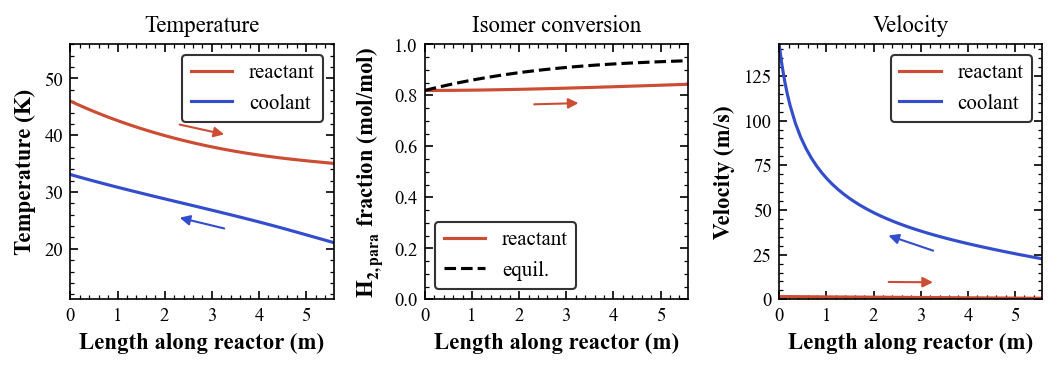

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold1B_In.M*86.4,  # tonne-per-day
        'temperature':  cold1B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold1B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

Final HX-6 Geometry
Length [m]  =  6.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  27.0


HX-B Geometry
Length [m]  =  6.0
Width  [m]  =  1.5
Height [m]  =  2.913
Volume [m3] =  26.219

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          7.81e+00       0.00e+00          50             87       
       2          3.73e-04       0.00e+00          137            32       
       3          3.19e-05       0.00e+00          169             0       
Solved in 3 iterations, number of nodes 169. 
Maximum relative residual: 3.19e-05 
Maximum boundary residual: 0.00e+00


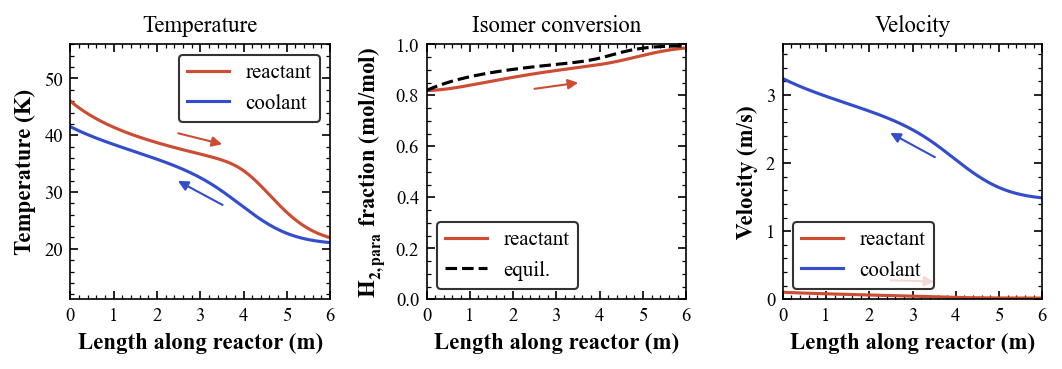

In [6]:
#Adjusted geometry
lengthPFHX = 6.000
widthPFHX  = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold1B_In.M*86.4,  # tonne-per-day
        'temperature':  cold1B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold1B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-6 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [7]:
xpara_final = 0.1/(math.exp(-175/mainH2_Out.T)+0.1) - 7.06*(10**-9)*(mainH2_Out.T**3) \
                + 3.42*(10**-6)*(mainH2_Out.T**2) - 6.2*(10**-5)*mainH2_Out.T - 0.00227

print(xpara_final)

0.970307481347243


In [8]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1955.495900              124.263768   
1    0.061224              1955.476401              124.274744   
2    0.122449              1955.457215              124.285640   
3    0.183673              1955.438333              124.296458   
4    0.244898              1955.419743              124.307201   
..        ...                      ...                     ...   
164  5.836735              1954.516935              124.989209   
165  5.877551              1954.513436              124.991918   
166  5.918367              1954.509939              124.994620   
167  5.959184              1954.506443              124.997313   
168  6.000000              1954.502949              125.000000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                   46.000000                41.503291   
1                   45.619413                41.271756   
2                   45.256143    